In [1]:
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
stock_df = pd.read_csv("Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)['Adj Close']
stock_df = stock_df.sort_index()
stock_df.tail()

Date
2021-03-15    707.940002
2021-03-16    676.880005
2021-03-17    701.809998
2021-03-18    653.159973
2021-03-19    654.869995
Name: Adj Close, dtype: float64

In [3]:
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

Date
2018-03-20   -0.009599
2018-03-21    0.019256
2018-03-22   -0.023473
2018-03-23   -0.024458
2018-03-26    0.008755
Name: Adj Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

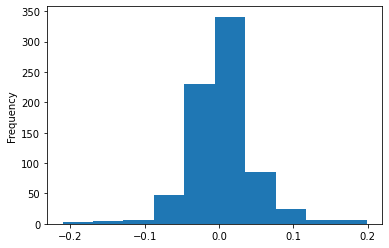

In [4]:
returns.plot(kind="hist")

In [5]:
mean = returns.mean()
std = returns.std()
(mean, std)

(0.004084559241466523, 0.044342739787770785)

In [6]:
from random import gauss
gauss(mean, std)

-0.0026733103652820008

In [7]:
last_val = stock_df.iloc[-1]
last_val

654.8699951171875

In [8]:
last_val * (1+gauss(mean,std))

668.1983085403944

In [9]:
simvals = [last_val]
days = 15
for day in range(days):
    newval = simvals[:]

In [10]:
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        

    return simvals

In [11]:
simulate_stocks(30,last_val)

[654.8699951171875,
 677.3103125884764,
 677.2659622810409,
 623.9701747816312,
 627.441686724702,
 605.3991552195521,
 592.3238609772525,
 606.1411518524102,
 650.879586365648,
 696.5889355047963,
 645.4647009756605,
 614.8178663852558,
 675.2482733228946,
 699.5210081116395,
 689.2345884864599,
 659.287249892725,
 638.8720223115596,
 637.7322051026572,
 651.8704812603602,
 716.5170578421196,
 745.6290904202538,
 774.3679734419462,
 762.6264182260527,
 790.3114992142615,
 811.5136569957303,
 818.2315627358425,
 822.8711558366326,
 805.773060615064,
 823.6912636846312,
 858.6285687794727,
 880.1480710898583]

In [12]:
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [13]:
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,654.869995,668.753815,671.695411,693.026583,699.848817,726.050075,683.567724,712.679126,697.366277,710.776409,728.168589,799.212344,782.508925,817.992385,778.502961,756.983510
1,654.869995,685.029274,700.189232,784.188043,819.533066,809.997561,839.056667,882.951361,932.295174,881.599984,782.694256,806.239967,849.431227,853.963032,888.767268,858.460491
2,654.869995,663.997783,696.980955,666.344775,667.989437,672.636902,639.678472,623.489037,615.102870,626.808482,650.817996,643.574131,634.435749,626.331312,623.859292,647.666913
3,654.869995,632.849976,666.162470,633.236037,621.035030,601.574214,632.608631,637.133380,624.032011,658.581194,601.963968,583.201066,599.456799,558.235393,564.580249,593.996903
4,654.869995,673.763465,621.526779,579.046423,554.967253,549.402015,537.442338,571.715818,574.330292,587.881542,625.755037,637.231234,640.798725,654.551616,599.285559,650.130590


In [14]:
results_df = pd.DataFrame(results).T
results_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,...,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995,654.869995
1,668.753815,685.029274,663.997783,632.849976,673.763465,666.595582,661.010921,653.389916,622.008021,681.394483,...,640.787541,627.128347,679.153516,703.424887,666.339638,639.474063,666.233946,633.028841,599.116021,673.898587
2,671.695411,700.189232,696.980955,666.162470,621.526779,696.769296,682.361881,568.623869,598.957497,637.156642,...,684.045467,658.282560,685.704967,740.936679,672.984279,648.513057,679.836729,685.386143,644.347468,677.468481
3,693.026583,784.188043,666.344775,633.236037,579.046423,729.368057,633.658033,604.775316,613.973600,636.507499,...,679.458310,612.535105,699.622121,711.168462,668.170385,640.668538,715.650070,705.559669,678.157374,675.894402
4,699.848817,819.533066,667.989437,621.035030,554.967253,713.908462,683.660967,591.234604,617.192868,657.250082,...,673.527243,594.694802,678.963938,728.886843,645.660860,667.829720,687.692621,694.599462,732.095659,676.079989


<AxesSubplot:>

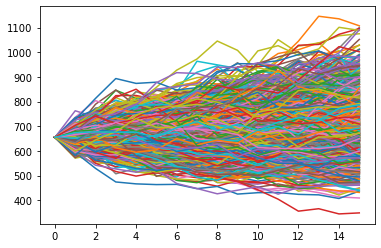

In [15]:
results_df.plot(legend=False)

In [16]:
end_values = results_df.iloc[-1]
end_values.head()

0    756.983510
1    858.460491
2    647.666913
3    593.996903
4    650.130590
Name: 15, dtype: float64

<AxesSubplot:ylabel='Frequency'>

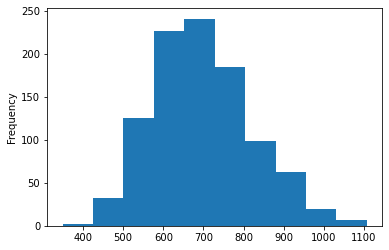

In [17]:
end_values.plot(kind="hist")

In [18]:
# Calculate the range of possible prices 
end_values.quantile([0.1,0.9])

0.1    549.015155
0.9    868.382565
Name: 15, dtype: float64

In [19]:
last_val

654.8699951171875